# Neural Networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Generate synthetic data

X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

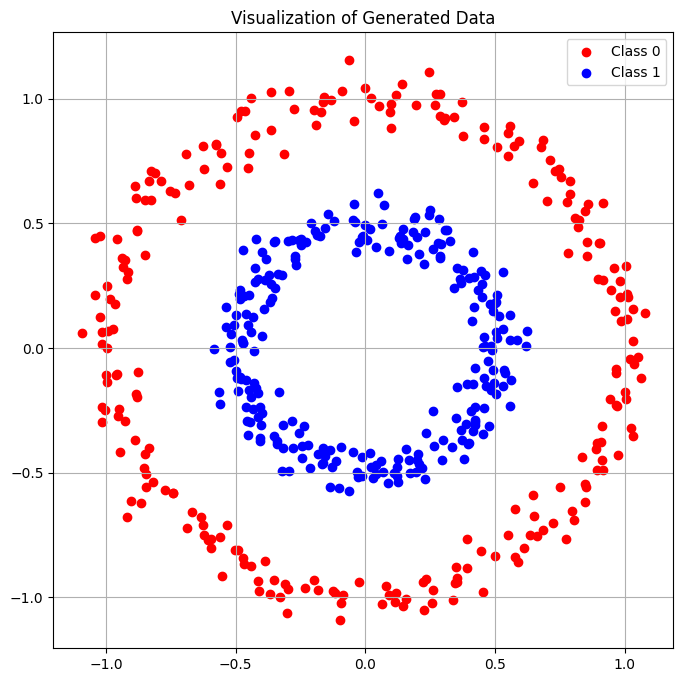

In [ ]:
# Plotting the data
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Visualization of Generated Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a Sequential model
model = Sequential([
    Dense(10, input_shape=(2,), activation='relu'),  # Hidden layer with 10 neurons
    Dense(10, activation='relu'),  # Additional hidden layer for complex patterns
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the data
history = model.fit(X, y, epochs=100, verbose=1)
# Set verbose to 0 for no output during training

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5662 - loss: 0.6785
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6868 - loss: 0.6264
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.5592 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.4662
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.3024  
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1599 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0826
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0404 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0212
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0145 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0110
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.000

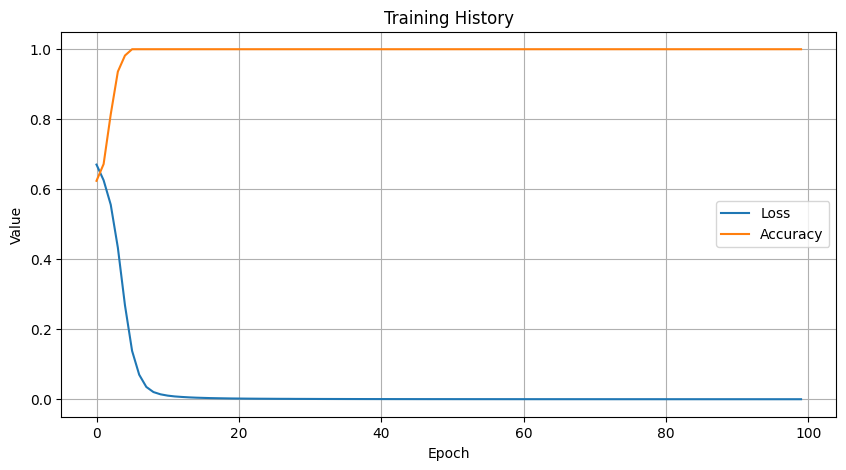

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


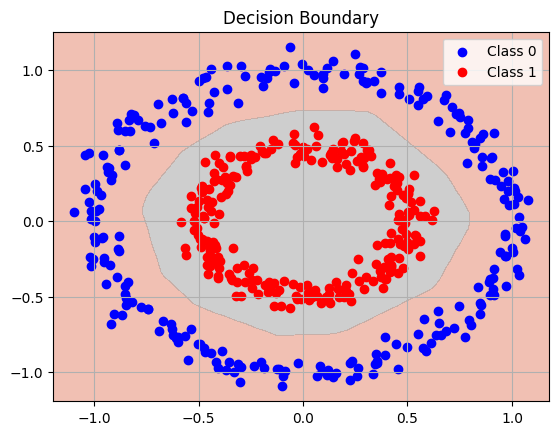

In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.1, max(X[:, 0]) + 0.1, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.1, max(X[:, 1]) + 0.1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)

    plt.contourf(xx, yy, z, levels=[0, 0.5, 1], cmap='RdGy', alpha=0.5)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')
    plt.title("Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the decision boundary
plot_decision_boundary(X, y, model)